In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0), (255, 255, 0),
          (0, 255, 255), (255, 0, 255), (100, 100, 255), (255, 255, 100)]


In [10]:
path_csv = r'C:\workspace\hakaton\hackCBreakthrough\create_markup\test.csv'
path_dataset = r"C:\workspace\hakaton\dataset_yolo\train"

In [11]:
df = pd.read_csv(path_csv)

In [12]:
df.head()

,frame_id,type_name,type_id,obj_id,path_img,path_mask,x1,y1,x2,y2,height,width
0,1496,klikun,0,0,klikun\images\2838665848.jpg,klikun\masks\2838665848.png,139,89,479,459,599,800
1,353,klikun,0,0,klikun\images\1485516500.jpg,klikun\masks\1485516500.png,3,3,392,489,500,408
2,372,klikun,0,0,klikun\images\1486047569.jpg,klikun\masks\1486047569.png,85,132,340,378,423,450
3,334,klikun,0,0,klikun\images\1483387320.jpg,klikun\masks\1483387320.png,95,118,441,322,402,500
4,2744,klikun,0,0,klikun\images\4011766400.jpg,klikun\masks\4011766400.png,0,147,1435,1330,1365,2048


In [ ]:
import random
import cv2
import numpy as np
from os import path as osp

def get_flight_id_list(flight_id):
    return list(df[df.flight_id == flight_id]['file_name'].unique())

def get_objs_img(file_name):
    tv_c_xy_wh = df[df.file_name == file_name][
    ['type_id', 'x1', 'y1', 'size.width', 'size.height']]\
    .to_numpy().astype(int)
    return tv_c_xy_wh

def get_draw_imgs(base_file_name):
    file_name = base_file_name
    ir_img = cv2.imread(osp.join(path_dataset, str(file_name) + '.jpg'))
    tv_img = cv2.imread(osp.join(PATH_TV, str(file_name) + '.jpg'))

    # отбор и отрисовка в боксов
    # ir_c_xy_wh = df1[df1.file_name == file_name][
    #     ['objectClass', 'origin.x', 'origin.y', 'size.width', 'size.height']]\
    #     .to_numpy().astype(int)
    tv_c_xy_wh = ir_c_xy_wh = df[df.file_name == file_name][
        ['objectClass', 'origin.x', 'origin.y', 'size.width', 'size.height']]\
        .to_numpy().astype(int)
    for cls_id, x, y, w, h in ir_c_xy_wh:
        color = colors[cls_id]
        cv2.rectangle(ir_img, (x, y), (x + w, y + h), color, 1)
        cv2.putText(ir_img, str(cls_id), (x, y - 5), color=color,
                    fontScale=0.6, thickness=1, lineType=cv2.LINE_AA,
                    fontFace=cv2.FONT_HERSHEY_PLAIN)
    for cls_id, x, y, w, h in tv_c_xy_wh:
        color = colors[cls_id]
        cv2.rectangle(tv_img, (x, y), (x + w, y + h), color, 1)
        cv2.putText(tv_img, str(cls_id), (x, y - 5), color=color,
                    fontScale=0.6, thickness=1, lineType=cv2.LINE_AA,
                    fontFace=cv2.FONT_HERSHEY_PLAIN)
    return ir_img, tv_img



In [ ]:
# q - quit
# s - save to SAVED_DIR
# b - save to BAD_DIR
# 0-9 jump in time and space
# f, d  +- step
# + - change step size (mul or div by 2)


def show_imgs_from_namelist(base_filename_list, shuffle=False, offset=0):
    SAVED_DIR = 'SAVED_IR_TV'
    BAD_DIR = 'BAD_IR_TV'

    # while True:
    #     file_name = random.choice(base_filename_list)
    base_filename_list = list(base_filename_list)
    if shuffle:
        random.shuffle(base_filename_list)


    show_scale = 1
    i = offset
    step = 1
    while True:
        if i >= len(base_filename_list):
            break
        if i < 0:
            i = 0
        file_name = base_filename_list[i]
        print()
        print(f'File name: {file_name} index: {i}', end=' ')
        ir_img, tv_img = get_draw_imgs(file_name)

        cv2.imshow('ir', ir_img if show_scale == 1 else cv2.resize(ir_img[:], (0,0), fx=show_scale, fy=show_scale))
        cv2.imshow('tv', tv_img if show_scale == 1 else cv2.resize(tv_img[:], (0,0), fx=show_scale, fy=show_scale))

        key = cv2.waitKey(0)
        match key:
            case 113 | 27:  # q
                break
            case 115:  # s
                os.makedirs(SAVED_DIR, exist_ok=True)
                cv2.imwrite(osp.join(SAVED_DIR, str(file_name) + '.jpg'),
                            np.concatenate([tv_img, ir_img], axis=1))
                print("  save to SAVED_DIR", end=' ')

            case 98:  # b
                os.makedirs(BAD_DIR, exist_ok=True)
                cv2.imwrite(osp.join(BAD_DIR, str(file_name) + '.jpg'),
                            np.concatenate([tv_img, ir_img], axis=1))
                print("  save to BAD_DIR", end=' ')

            case 102|39:  # f and right arrow
                i += step

            case 100|37:  # d and left arrow
                i -= step

            case 43: # +
                step = step * 2
                print(f'step = {step}', end=' ')

            case 38: # arrow up
                show_scale += 0.1
                print(f'show_scale = {show_scale:.1f}', end=' ')
            case 40: # arrow down
                show_scale -= 0.1
                print(f'show_scale = {show_scale:.1f}', end=' ')
            case 8: # backspace
                show_scale = 1
                step = 1
                print(f'show_scale = {show_scale:.1f}', f'step = {step}', end=' ')
            case 45: # -
                step = step // 2
                if step == 0:
                    step = 1
                print(f'step = {step}', end=' ')

            case _:
                # print('\n', key)
                if 48 <= key <= 57:  # 0-9
                    # перемещаем позицию пропорционально числу от 0 до 9 (0 первый кадр, 9 последний)
                    i = int((key - 48) / 9 * (len(base_filename_list) - 1))
                    continue

                i += 1
    cv2.destroyAllWindows()

In [ ]:
df1_f_id_count = df[['file_name', 'id']].groupby('file_name').count()

In [ ]:
# df_diff_count_id = df1_f_id_count.merge(df_f_id_count, on='file_name')
# df_diff_count_id = df_diff_count_id[df_diff_count_id.id_x != df_diff_count_id.id_y]
# df_diff_count_id.info(), df_diff_count_id

In [ ]:
# cv2.destroyAllWindows()

In [ ]:
# file_list = df_diff_count_id.sort_index(key=lambda x: x.astype(int)).index
# show_imgs_from_namelist(file_list)

# Просмотр полета

In [17]:
# случайноые кадры
show_imgs_from_namelist(df.file_name.unique(), shuffle=True)


File name: 21501 index: 0 
File name: 37306 index: 1 
File name: 11174 index: 2 
File name: 33147 index: 3 
File name: 51761 index: 4 
File name: 52629 index: 5 
File name: 35707 index: 6 
File name: 14956 index: 7 
File name: 26554 index: 8 
File name: 43222 index: 9 
File name: 11125 index: 10 
File name: 51559 index: 11 
File name: 4293 index: 12 
File name: 26074 index: 13   save to SAVED_DIR 
File name: 26074 index: 13 
File name: 3263 index: 14 
File name: 17118 index: 15 
File name: 48173 index: 16 
File name: 53415 index: 17 
File name: 26518 index: 18 
File name: 28438 index: 19 
File name: 24745 index: 20 
File name: 36780 index: 21 
File name: 7388 index: 22 
File name: 33693 index: 23 
File name: 9844 index: 24 
File name: 1676 index: 25 
File name: 41435 index: 26 
File name: 14518 index: 27 
File name: 2360 index: 28 
File name: 40741 index: 29 
File name: 4942 index: 30 
File name: 55367 index: 31 
File name: 30489 index: 32   save to SAVED_DIR 
File name: 30489 index: 

In [16]:
# по id полета
flight_id_list = get_flight_id_list(1543)
show_imgs_from_namelist(flight_id_list)


In [ ]:
show_imgs_from_namelist(get_flight_id_list(1364))

In [14]:
show_imgs_from_namelist(get_flight_id_list(406))


File name: 40600 index: 0 
File name: 40601 index: 1 
File name: 40602 index: 2 
File name: 40603 index: 3 
File name: 40604 index: 4 
File name: 40605 index: 5 
File name: 40606 index: 6 
File name: 40607 index: 7 
File name: 40608 index: 8 
File name: 40609 index: 9 
File name: 40610 index: 10 
File name: 40611 index: 11 
File name: 40612 index: 12 
File name: 40613 index: 13 
File name: 40614 index: 14 
File name: 40615 index: 15 
File name: 40616 index: 16 
File name: 40617 index: 17 
File name: 40618 index: 18 
File name: 40619 index: 19 
File name: 40620 index: 20 
File name: 40621 index: 21 
File name: 40622 index: 22 
File name: 40623 index: 23 
File name: 40624 index: 24 
File name: 40625 index: 25 
File name: 40626 index: 26 
File name: 40627 index: 27 
File name: 40628 index: 28 
File name: 40629 index: 29 
File name: 40630 index: 30 
File name: 40631 index: 31 
File name: 40632 index: 32 
File name: 40633 index: 33 
File name: 40634 index: 34 
File name: 40635 index: 35 
F

In [ ]:
show_imgs_from_namelist(df.file_name.unique(), shuffle=True)

# Размер объектов

<Axes: >

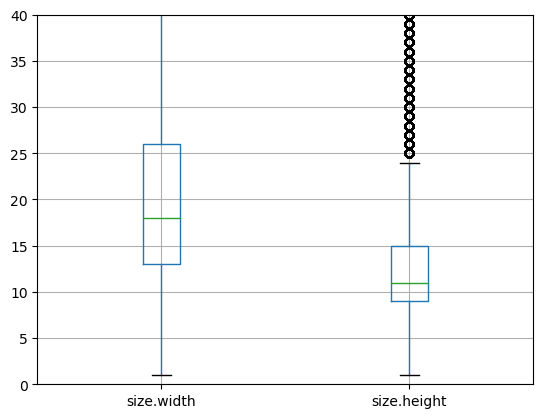

In [18]:
plt.ylim(0, 40)
df[['size.width', 'size.height']].boxplot()

In [19]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df[['size.width', 'size.height']].describe()

,size.width,size.height
count,489559.00,489559.00
mean,22.23,13.50
std,17.93,10.17
min,1.00,1.00
25%,13.00,9.00
50%,18.00,11.00
75%,26.00,15.00
max,633.00,460.00


<Axes: xlabel='objectClass'>

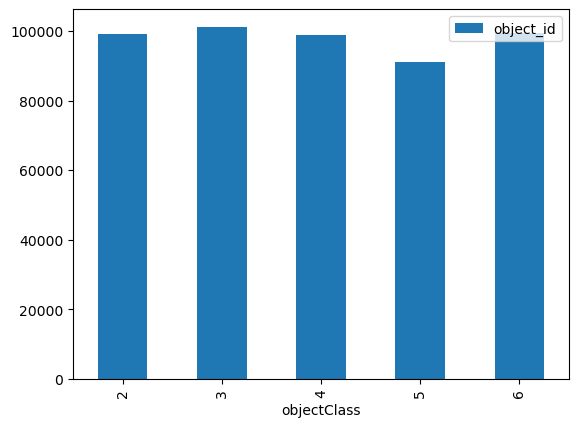

In [20]:
df[['objectClass', 'object_id']].groupby(by='objectClass').count().plot(kind='bar')

In [49]:
px = 5
mask = (df['size.height'] < px ) | (df['size.width'] < px )
small_obj_df = df[mask]
small_obj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4519 entries, 43 to 489462
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4519 non-null   int64  
 1   id           4519 non-null   int64  
 2   object_id    4519 non-null   int64  
 3   objectClass  4519 non-null   int64  
 4   region       4519 non-null   object 
 5   file_name    4519 non-null   object 
 6   flight_id    4519 non-null   int64  
 7   origin.x     4519 non-null   float64
 8   origin.y     4519 non-null   float64
 9   size.width   4519 non-null   float64
 10  size.height  4519 non-null   float64
dtypes: float64(4), int64(5), object(2)
memory usage: 423.7+ KB


In [47]:

df = df[~mask]

In [50]:
show_imgs_from_namelist(small_obj_df['file_name'].unique())


File name: 3 index: 0 
File name: 37 index: 1 
File name: 102 index: 2 
File name: 113 index: 3 
File name: 137 index: 4 
File name: 138 index: 5 
File name: 153 index: 6 
File name: 156 index: 7 
File name: 174 index: 8 
File name: 210 index: 9 
File name: 232 index: 10 
File name: 306 index: 11 
File name: 310 index: 12 
File name: 319 index: 13 
File name: 323 index: 14 
File name: 324 index: 15 
File name: 341 index: 16 
File name: 342 index: 17 
File name: 343 index: 18 
File name: 352 index: 19 
File name: 379 index: 20 
File name: 380 index: 21 
File name: 416 index: 22 
File name: 419 index: 23 
File name: 420 index: 24 
File name: 425 index: 25 
File name: 464 index: 26 
File name: 476 index: 27 
File name: 481 index: 28 
File name: 488 index: 29 
File name: 496 index: 30 
File name: 510 index: 31 
File name: 512 index: 32 
File name: 516 index: 33 
File name: 521 index: 34 
File name: 530 index: 35 
File name: 544 index: 36 
File name: 545 index: 37 
File name: 552 index: 38

In [27]:
mask = (df['size.height'] > 200 ) | (df['size.width'] > 200 )
big_obj_df = df[mask]

big_obj_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      int64  
 1   id           0 non-null      int64  
 2   object_id    0 non-null      int64  
 3   objectClass  0 non-null      int64  
 4   region       0 non-null      object 
 5   file_name    0 non-null      object 
 6   flight_id    0 non-null      int64  
 7   origin.x     0 non-null      float64
 8   origin.y     0 non-null      float64
 9   size.width   0 non-null      float64
 10  size.height  0 non-null      float64
dtypes: float64(4), int64(5), object(2)
memory usage: 0.0+ bytes


In [26]:
# big_obj_df.file_name.values
# mask = df.file_name.isin(big_obj_df.file_name.values)
# # df[mask]
# df = df[~mask]

In [25]:
show_imgs_from_namelist(big_obj_df.file_name.unique(), shuffle=False)


File name: 118 index: 0 
File name: 178 index: 1 
File name: 349 index: 2 
File name: 536 index: 3 
File name: 554 index: 4 
File name: 723 index: 5 
File name: 763 index: 6 
File name: 791 index: 7 
File name: 817 index: 8 
File name: 958 index: 9 
File name: 1104 index: 10 
File name: 1232 index: 11 
File name: 1267 index: 12 
File name: 1283 index: 13 
File name: 1305 index: 14 
File name: 1350 index: 15 
File name: 1376 index: 16 
File name: 1406 index: 17 
File name: 1467 index: 18 
File name: 1497 index: 19 
File name: 1507 index: 20 
File name: 1512 index: 21 
File name: 1566 index: 22 
File name: 1567 index: 23 
File name: 1568 index: 24 
File name: 1598 index: 25 
File name: 1599 index: 26 
File name: 1606 index: 27 
File name: 1672 index: 28 
File name: 1805 index: 29 
File name: 1877 index: 30 
File name: 1913 index: 31 
File name: 1993 index: 32 
File name: 2006 index: 33 
File name: 2026 index: 34 
File name: 2081 index: 35 
File name: 2116 index: 36 
File name: 2117 inde

In [29]:
# get_objs_ir('70654')


In [ ]:
# img = np.random.randint(0, 255, (300,300,3), np.uint8)
# cv2.rectangle(img, (0, 0), (10, 10), color=(255,0,0))
# cv2.imshow('', img)
# print(cv2.waitKey(0))
# cv2.destroyAllWindows()

# Объект в объекте

In [ ]:
# import pickle
# with open('ob_in_ob_flist2', 'rb') as f:
#     ob_in_ob_list = pickle.load(f)
# len(ob_in_ob_list)

In [35]:
from tqdm import tqdm

res_list = []
start_file_list = df.file_name.unique()
# start_file_list = ob_in_ob_list
for frame in tqdm(start_file_list):
    objs = get_objs_ir(frame)
    objs = np.array([row for row in objs if row[3]<=200 and row[4]<=200]) # отсеиваем большие ошибочные боксы
    x, y, w, h = objs[:,1:2], objs[:,2:3], objs[:,3:4], objs[:,4:5]
    xc = x + w/2
    yc = y + h/2
    w = 1.2 * w
    h = 1.2 * h

    for i in range(len(xc)):
        if len(res_list) and res_list[-1]==frame:
            break
        for j in range(len(xc)):
            if i==j:
                continue

            if (xc[i]-w[i]/2) <= xc[j] <= (xc[i]+w[i]/2) \
                and (yc[i]-h[i]/2) <= yc[j] <= (yc[i]+h[i]/2):
                res_list.append(frame)
                break
len(res_list)

100%|██████████| 57930/57930 [20:12<00:00, 47.79it/s]


80

In [36]:
show_imgs_from_namelist(res_list)


File name: 380 index: 0 
File name: 384 index: 1 
File name: 389 index: 2 
File name: 988 index: 3 
File name: 996 index: 4 
File name: 1014 index: 5 
File name: 1018 index: 6 
File name: 2001 index: 7 
File name: 4393 index: 8 
File name: 5393 index: 9 
File name: 5793 index: 10 
File name: 6156 index: 11 
File name: 6290 index: 12 
File name: 6393 index: 13 
File name: 7793 index: 14 
File name: 7963 index: 15 
File name: 8675 index: 16 
File name: 8977 index: 17 
File name: 9455 index: 18 
File name: 16053 index: 19 
File name: 9455 index: 18 
File name: 8977 index: 17 
File name: 8675 index: 16 
File name: 7963 index: 15 
File name: 7793 index: 14 
File name: 6393 index: 13 
File name: 6290 index: 12 
File name: 6156 index: 11 
File name: 5793 index: 10 
File name: 5393 index: 9 
File name: 4393 index: 8 
File name: 2001 index: 7 
File name: 1018 index: 6 
File name: 1014 index: 5 
File name: 996 index: 4 
File name: 988 index: 3 
File name: 389 index: 2 
File name: 384 index: 1 


In [31]:
import pickle
with open('ob_in_ob_1805-2', 'wb') as f:
    pickle.dump(res_list, f)

In [ ]:

# mask = df.file_name.isin(res_list)
# df[mask]
# df = df[~mask]

In [34]:
# df = df[~df.file_name.isin(res_list)]

In [126]:
len(df)
df.to_csv('filtered_json2.csv')

In [127]:
len(df)

1520636

In [ ]:
show_imgs_from_namelist(res_list)

# удаление

In [108]:
path = r"C:\Users\Mike\workspace\no_integral\cheсk_ds\SAVED_IR_TV"
print(" ".join(os.listdir(path)))

10200.jpg 1076.jpg 10896.jpg 11424.jpg 1155.jpg 11858.jpg 16053.jpg 18673.jpg 19515.jpg 19689.jpg 23756.jpg 24264.jpg 25908.jpg 26074.jpg 26162.jpg 26488.jpg 26736.jpg 26963.jpg 27136.jpg 27371.jpg 27481.jpg 27508.jpg 27577.jpg 28462.jpg 29177.jpg 29715.jpg 30388.jpg 30489.jpg 31465.jpg 31927.jpg 32017.jpg 33017.jpg 344.jpg 34445.jpg 35681.jpg 36656.jpg 37111.jpg 38217.jpg 38442.jpg 38736.jpg 38977.jpg 3912.jpg 39136.jpg 39577.jpg 4017.jpg 40656.jpg 40684.jpg 41178.jpg 42127.jpg 42789.jpg 43281.jpg 4335.jpg 43841.jpg 45967.jpg 46108.jpg 47163.jpg 47336.jpg 47509.jpg 47557.jpg 47708.jpg 47910.jpg 47927.jpg 48502.jpg 48823.jpg 4936.jpg 4967.jpg 5171.jpg 51824.jpg 53245.jpg 5393.jpg 54099.jpg 56402.jpg 5793.jpg 58046.jpg 59204.jpg 60278.jpg 60563.jpg 60868.jpg 60961.jpg 60999.jpg 6156.jpg 6193.jpg 6290.jpg 6393.jpg 6567.jpg 6936.jpg 718.jpg 7344.jpg 7617.jpg 7785.jpg 7793.jpg 7888.jpg 7963.jpg 8163.jpg 8675.jpg 9186.jpg 9455.jpg 978.jpg


In [113]:
mask = df.file_name.isin([name.split('.')[0] for name in os.listdir(path)])
print(df[mask].__len__())
# df = df[~mask]

0


In [107]:
fl_id_list = []
for file in os.listdir(path):
    frame = int(file.split('.')[0])//100
    fl_id_list.append(frame)
len(fl_id_list)

98

In [112]:
mask = df.flight_id.isin(fl_id_list)
df[mask].__len__()
# df = df[~mask]

79260

# Разбиени датасета

In [58]:
df.head()

,id,object_id,objectClass,region,file_name,flight_id,origin.x,origin.y,size.width,size.height
0,1,2,4,"{'origin': {'x': '283', 'y': '299'}, 'size': {...",0,0,283.00,299.00,12.00,9.00
11,6,38,3,"{'origin': {'x': '208', 'y': '169'}, 'size': {...",0,0,208.00,169.00,15.00,11.00
10,2,9,3,"{'origin': {'x': '311', 'y': '231'}, 'size': {...",0,0,311.00,231.00,20.00,9.00
8,4,28,4,"{'origin': {'x': '445', 'y': '44'}, 'size': {'...",0,0,445.00,44.00,10.00,7.00
7,5,36,2,"{'origin': {'x': '57', 'y': '166'}, 'size': {'...",0,0,57.00,166.00,11.00,9.00


In [ ]:
df.info()

In [ ]:
df.file_name.head()

In [59]:
file_list = list(df.sort_values(by='file_name', key=lambda row: row.astype(int))['file_name'].unique())
len(file_list)

57894

In [60]:
ind1 = int(len(file_list) * 0.1)
ind2 = int(len(file_list) * 0.2)
val_list = file_list[:ind1]
test_list = file_list[ind1:ind2]
train_list = file_list[ind2:]
len(train_list), len(val_list), len(test_list)

(46316, 5789, 5789)

In [64]:
path_root_ds = 'dataset2'
path_to_save = r"D:\temp_db\no_integral\dataset2\split_json"
os.makedirs(path_to_save, exist_ok=True)
for name, file_list in zip(['train', 'val', 'test'], [train_list, val_list, test_list]):
    with open(osp.join(path_to_save, name + '.txt'), 'w') as f:
        for frame in tqdm(file_list):
            print(path_root_ds, frame, file=f)
print('done')

100%|██████████| 5789/5789 [00:00<00:00, 1826862.23it/s]

done


In [57]:


df.to_csv(path_csv, index=False)

In [56]:
# df.drop(columns='Unnamed: 0', inplace=True)

# Просмотр по классам и объектам

In [103]:
# mask = (df.objectClass == 6)
mask = (df.object_id == 47)
# mask = (df.object_id == 71)
file_list = df[mask].sort_values(by='size.width', ascending=False)['file_name'].unique()
len(file_list)

0

In [104]:
show_imgs_from_namelist(file_list)

In [102]:
# df = df[~mask]

C:\Users\Mike\AppData\Local\Temp\ipykernel_5084\2307793224.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~mask]


In [73]:
df[mask].sort_values(by='size.width', ascending=False)

,id,object_id,objectClass,region,file_name,flight_id,origin.x,origin.y,size.width,size.height
307141,2,47,6,"{'origin': {'x': '56', 'y': '427'}, 'size': {'...",35324,353,56.00,427.00,171.00,53.00
32706,2,47,6,"{'origin': {'x': '455', 'y': '437'}, 'size': {...",2991,29,455.00,437.00,162.00,43.00
48017,2,47,6,"{'origin': {'x': '325', 'y': '397'}, 'size': {...",4521,45,325.00,397.00,159.00,79.00
64530,2,47,6,"{'origin': {'x': '361', 'y': '351'}, 'size': {...",5779,57,361.00,351.00,156.00,68.00
258772,1,47,6,"{'origin': {'x': '336', 'y': '397'}, 'size': {...",30088,300,336.00,397.00,137.00,67.00
...,...,...,...,...,...,...,...,...,...,...
407495,10,47,6,"{'origin': {'x': '0', 'y': '73'}, 'size': {'wi...",49591,495,0.00,73.00,4.00,12.00
449432,6,47,6,"{'origin': {'x': '636', 'y': '236'}, 'size': {...",56485,564,636.00,236.00,4.00,13.00
305495,2,47,6,"{'origin': {'x': '636', 'y': '37'}, 'size': {'...",35104,351,636.00,37.00,4.00,9.00
337307,14,47,6,"{'origin': {'x': '478', 'y': '215'}, 'size': {...",39169,391,478.00,215.00,4.00,7.00


In [80]:
df[mask]['file_name'].to_csv('frames_objid47.txt', index=False, header=False)

In [98]:
cls_id = 2
mask = (df.objectClass == cls_id)
file_list = df[mask].sort_values(by='size.height', ascending=False)['file_name'].unique()
print(len(file_list))
show_imgs_from_namelist(file_list)

40104

File name: 27539 index: 0 
File name: 28219 index: 1 
File name: 25770 index: 2 
File name: 57425 index: 3 
File name: 60791 index: 4 
File name: 39473 index: 5 
File name: 33557 index: 6 
File name: 56915 index: 7 
File name: 55011 index: 8 
File name: 373 index: 9 
File name: 11150 index: 10 
File name: 24003 index: 11 
File name: 6934 index: 12 
File name: 31313 index: 13 
File name: 50965 index: 14 
File name: 60655 index: 15 
File name: 34441 index: 16 
File name: 38520 index: 17 
File name: 52121 index: 18 
File name: 26791 index: 19 
File name: 55825 index: 20 
File name: 36175 index: 21 
File name: 7683 index: 22 
File name: 15231 index: 23 
File name: 11048 index: 24 
File name: 17679 index: 25 
File name: 8533 index: 26 
File name: 31925 index: 27 
File name: 8533 index: 26 
File name: 17679 index: 25 
File name: 11048 index: 24 
File name: 17679 index: 25 
File name: 8533 index: 26 
File name: 31925 index: 27 
File name: 35903 index: 28 
File name: 47905 index: 29 
Fi

In [89]:
df[mask].sort_values(by='size.width', ascending=False)

,id,object_id,objectClass,region,file_name,flight_id,origin.x,origin.y,size.width,size.height
5106,12,71,2,"{'origin': {'x': '229', 'y': '346'}, 'size': {...",718,7,229.00,346.00,190.00,19.00
70605,11,71,2,"{'origin': {'x': '143', 'y': '219'}, 'size': {...",6193,61,143.00,219.00,181.00,14.00
332444,13,71,2,"{'origin': {'x': '154', 'y': '213'}, 'size': {...",38736,387,154.00,213.00,164.00,19.00
391758,15,71,2,"{'origin': {'x': '340', 'y': '149'}, 'size': {...",47163,471,340.00,149.00,148.00,8.00
36043,2,61,2,"{'origin': {'x': '42', 'y': '421'}, 'size': {'...",3433,34,42.00,421.00,146.00,59.00
...,...,...,...,...,...,...,...,...,...,...
448077,4,35,2,"{'origin': {'x': '636', 'y': '127'}, 'size': {...",56319,563,636.00,127.00,4.00,9.00
187914,8,79,2,"{'origin': {'x': '0', 'y': '473'}, 'size': {'w...",21013,210,0.00,473.00,4.00,7.00
419746,4,56,2,"{'origin': {'x': '0', 'y': '236'}, 'size': {'w...",51075,510,0.00,236.00,4.00,8.00
212404,9,46,2,"{'origin': {'x': '0', 'y': '347'}, 'size': {'w...",25437,254,0.00,347.00,4.00,8.00
